# Lean Protocols

###  RPGF3 List ✨

In [1]:
from collections import defaultdict
from datetime import datetime, timedelta, timezone
import json
import numpy as np
import pandas as pd

from scripts.eas_lists import listify, create_eas_json

# Prep

In [2]:
# settings

DATA_DIR  = "data/RPGF3/"
DATA_PATH = DATA_DIR + "2023-11-13_RPGF3_snapshot.csv"

LIST_DESC = "Projects that have a high ratio of onchain activity to active developers."
LINK_BASE = "https://github.com/opensource-observer/insights/blob/main/notebooks/"
FILENAME  = "2023-11-13_RPGF3_LeanProtocols.ipynb"
LIST_LINK = LINK_BASE + FILENAME

LIST_EVAL = " ".join([
                "This list looks at the ratio of onchain transactions (on OP Mainnet) to full-time active developers",
                "over the last 6 months. It awards 10K OP based on the logarithm of this ratio.",
                "Only projects with unique, public GitHub repos AND at least one contract address",
                "included in their RPGF3 application are considered through this method. You can view",
                "additional data about the projects included in this list on https://opensource.observer.",
                "Note: lists generated by the OSO team do not include OSO in them in order to comply",
                "with voting rules, so please consider adding our project to your ballot separately. Always DYOR!"
                ]) 

LIST_CATS = [
            #'COLLECTIVE_GOVERNANCE',
            #'DEVELOPER_ECOSYSTEM', 
            'END_USER_EXPERIENCE_AND_ADOPTION', 
            #'OP_STACK'
            ]

JSON_PATH = DATA_DIR + "lists/OSO_LeanProtocols.json"

In [3]:
# ingest data

df = pd.read_csv(DATA_PATH)
cols = ['Project ID', 'Project Name', 'OSO Slug', 
        'Onchain Users Last 6 Months', 'Avg Monthly Active Devs Last 6 Months', 'Total Txns']

df = df[cols].dropna()
df = df[df['Avg Monthly Active Devs Last 6 Months'] > 0]
df = df[df['Onchain Users Last 6 Months'] >= 10]
df

,Project ID,Project Name,OSO Slug,Onchain Users Last 6 Months,Avg Monthly Active Devs Last 6 Months,Total Txns
8,0xd730a803f5714c7f1b5e518edd57121d1b64c8c91cf6...,Account Abstraction - ERC-4337,eth-infinitism-account-abstraction,312.0,0.333333,422104.0
9,0xc69423093777bdb9ea96d3047694d4de113cc4722d98...,Across Protocol,across,11005.0,4.333333,338067.0
23,0x7cf3ce699a7d72e767947a95cf180a72884dddfd70b3...,Another World,another-world,16.0,0.666667,961.0
40,0xda538dc56054ec05476e152009df9af3e1947505e067...,AW House/Komorebi's Hacker House,aw-labs,19.0,1.500000,100.0
62,0x5fea22432b5b5a6f836e2d7f40372234e9a4e5d987b2...,Beam Wallet LLC,eco-association,156.0,0.166667,686.0
109,0xa9260589617014351c0138126f203c9dbb72d5983bfd...,Clique,cliqueofficial,37899.0,2.166667,199429.0
118,0xcec7aea98b44a9e53c771a33664e9349c0cfd6d9bb76...,Coordinape,coordinape,26176.0,2.166667,46784.0
150,0x8afe332e8f4c42d4df6e92389c13e0e1b3a433696557...,Decent.xyz,decent,125.0,0.333333,377.0
152,0x73e0327a0ed5b09bd040f874faa140adb5b17279c39c...,DecentrAgora,decentragora,14.0,0.333333,56.0
160,0xda04cebe79ec8547116a948edfbdb87e48dcb0543b29...,DefiLlama,defi-llama,30220.0,13.833333,76641.0


# Get the data to power the list

In [4]:
# run analysis

def scorer(row):
    
    if not isinstance(row['OSO Slug'], str):
        return 0
    
    ratio = np.log10(row['Total Txns'] / row['Avg Monthly Active Devs Last 6 Months'])
    score = np.ceil(ratio) * 10000    
    return score
        
scores = []
for _,row in df.iterrows():
    scores.append(scorer(row))

In [5]:
# transform the results

scores_to_projects = dict(zip(df['OSO Slug'], scores))
slugs_to_ids = dict(zip(df['OSO Slug'], df['Project ID']))

# Generate the list data

In [6]:
award_amt = sum(scores_to_projects.values())
award_amt

2220000.0

In [7]:
named_list = listify(scores_to_projects, award_amt)
rpgf_list = {slugs_to_ids[k]:v for k,v in named_list.items()}

50


<AxesSubplot:>

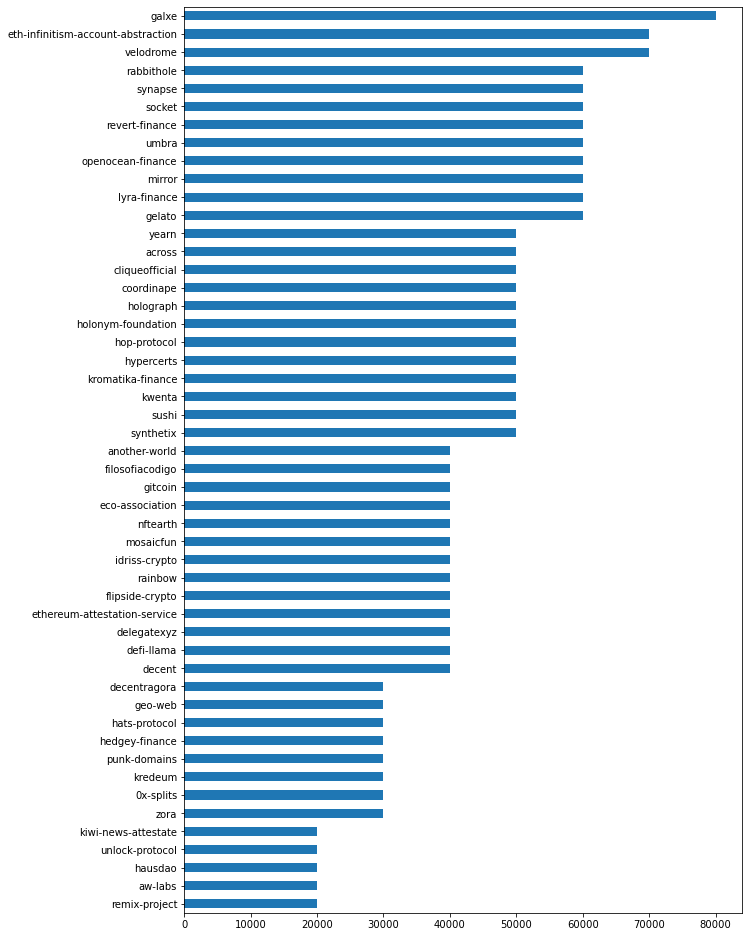

In [8]:
series = pd.Series(named_list).sort_values()
series = series[series>0]
print(len(series))
series.plot(kind='barh', figsize=(10,len(rpgf_list)/3))

In [9]:
eas_metadata = create_eas_json(rpgf_list, LIST_DESC, LIST_LINK, LIST_EVAL, LIST_CATS)

In [10]:
with open(JSON_PATH, "w") as f:
    json.dump(eas_metadata, f, indent=4)